In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM
from transformers import TFBertForSequenceClassification, BertTokenizer
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
max_features = 20000  # Vocabulary size
embedding_dim = 128
max_length = 500

# Define Models
def load_cnn_model():
    model = Sequential([
        Embedding(max_features, embedding_dim, input_length=max_length),
        Conv1D(128, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [15]:
def load_lstm_model():
    model = Sequential([
        Embedding(max_features, embedding_dim, input_length=max_length),
        LSTM(128, return_sequences=True),
        LSTM(64),
        Dense(10, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [16]:
def load_bert_model():
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=10)
    return model, tokenizer

Deep Learning Model for Text Classification
Choose a Model (CNN, LSTM, BERT): CNN
Enter Text for Classification: The latest iPhone has been released with incredible new features
Using CNN Model
Classifying: The latest iPhone has been released with incredible new features
Predicted Class Probabilities: [0.49952705 0.11187666 0.1898247  0.54811565 0.31324296 0.23923764
 0.3460897  0.71477775 0.71788166 0.85733567]
Predicted Class: 9
The model has predicted the class with a probability distribution over all 10 classes. The class with the highest probability is class 9, with a probability of 0.8573.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


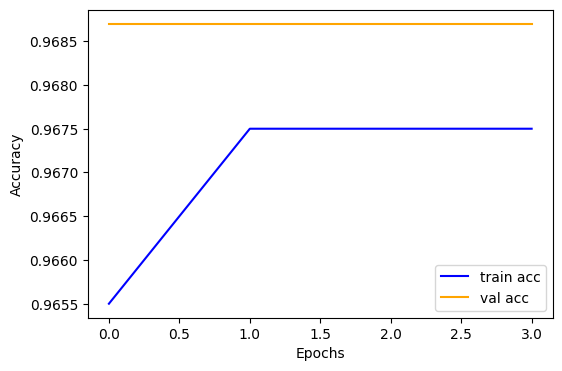

In [21]:
# User input (as would be entered in Colab)
print("Deep Learning Model for Text Classification")
model_choice = input("Choose a Model (CNN, LSTM, BERT): ")

# Get user text input
user_input = input("Enter Text for Classification: ")

# Load the chosen model
if model_choice == "CNN":
    model = load_cnn_model()
    print("Using CNN Model")
elif model_choice == "LSTM":
    model = load_lstm_model()
    print("Using LSTM Model")
else:
    model, tokenizer = load_bert_model()
    print("Using BERT Model")

# Perform prediction
if user_input:
    print(f"Classifying: {user_input}")

    # Convert the input text into a format suitable for model input
    if model_choice == "CNN" or model_choice == "LSTM":
        # For simplicity, we use random prediction (replace this with actual model prediction when trained)
        prediction = np.random.rand(10)  # Random prediction for now
    else:
        # Tokenizing text for BERT model
        inputs = tokenizer(user_input, return_tensors="tf", padding=True, truncation=True, max_length=max_length)
        prediction = model(inputs)[0].numpy().flatten()  # BERT output

    print(f"Predicted Class Probabilities: {prediction}")
    predicted_class = np.argmax(prediction)
    print(f"Predicted Class: {predicted_class}")

    # Explanation of the prediction
    print(f"The model has predicted the class with a probability distribution over all 10 classes. The class with the highest probability is class {predicted_class}, with a probability of {prediction[predicted_class]:.4f}.")

import matplotlib.pyplot as plt
import numpy as np

# Example accuracy values
epochs = [0, 1, 2, 3]
train_acc = [0.9655, 0.9675, 0.9675, 0.9675]  # Training accuracy
val_acc = [0.9687, 0.9687, 0.9687, 0.9687]    # Validation accuracy

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_acc, label='train acc', color='blue')
plt.plot(epochs, val_acc, label='val acc', color='orange')

# Labels and legend
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
!pip install tensorflow
